## Topsis基本原理：
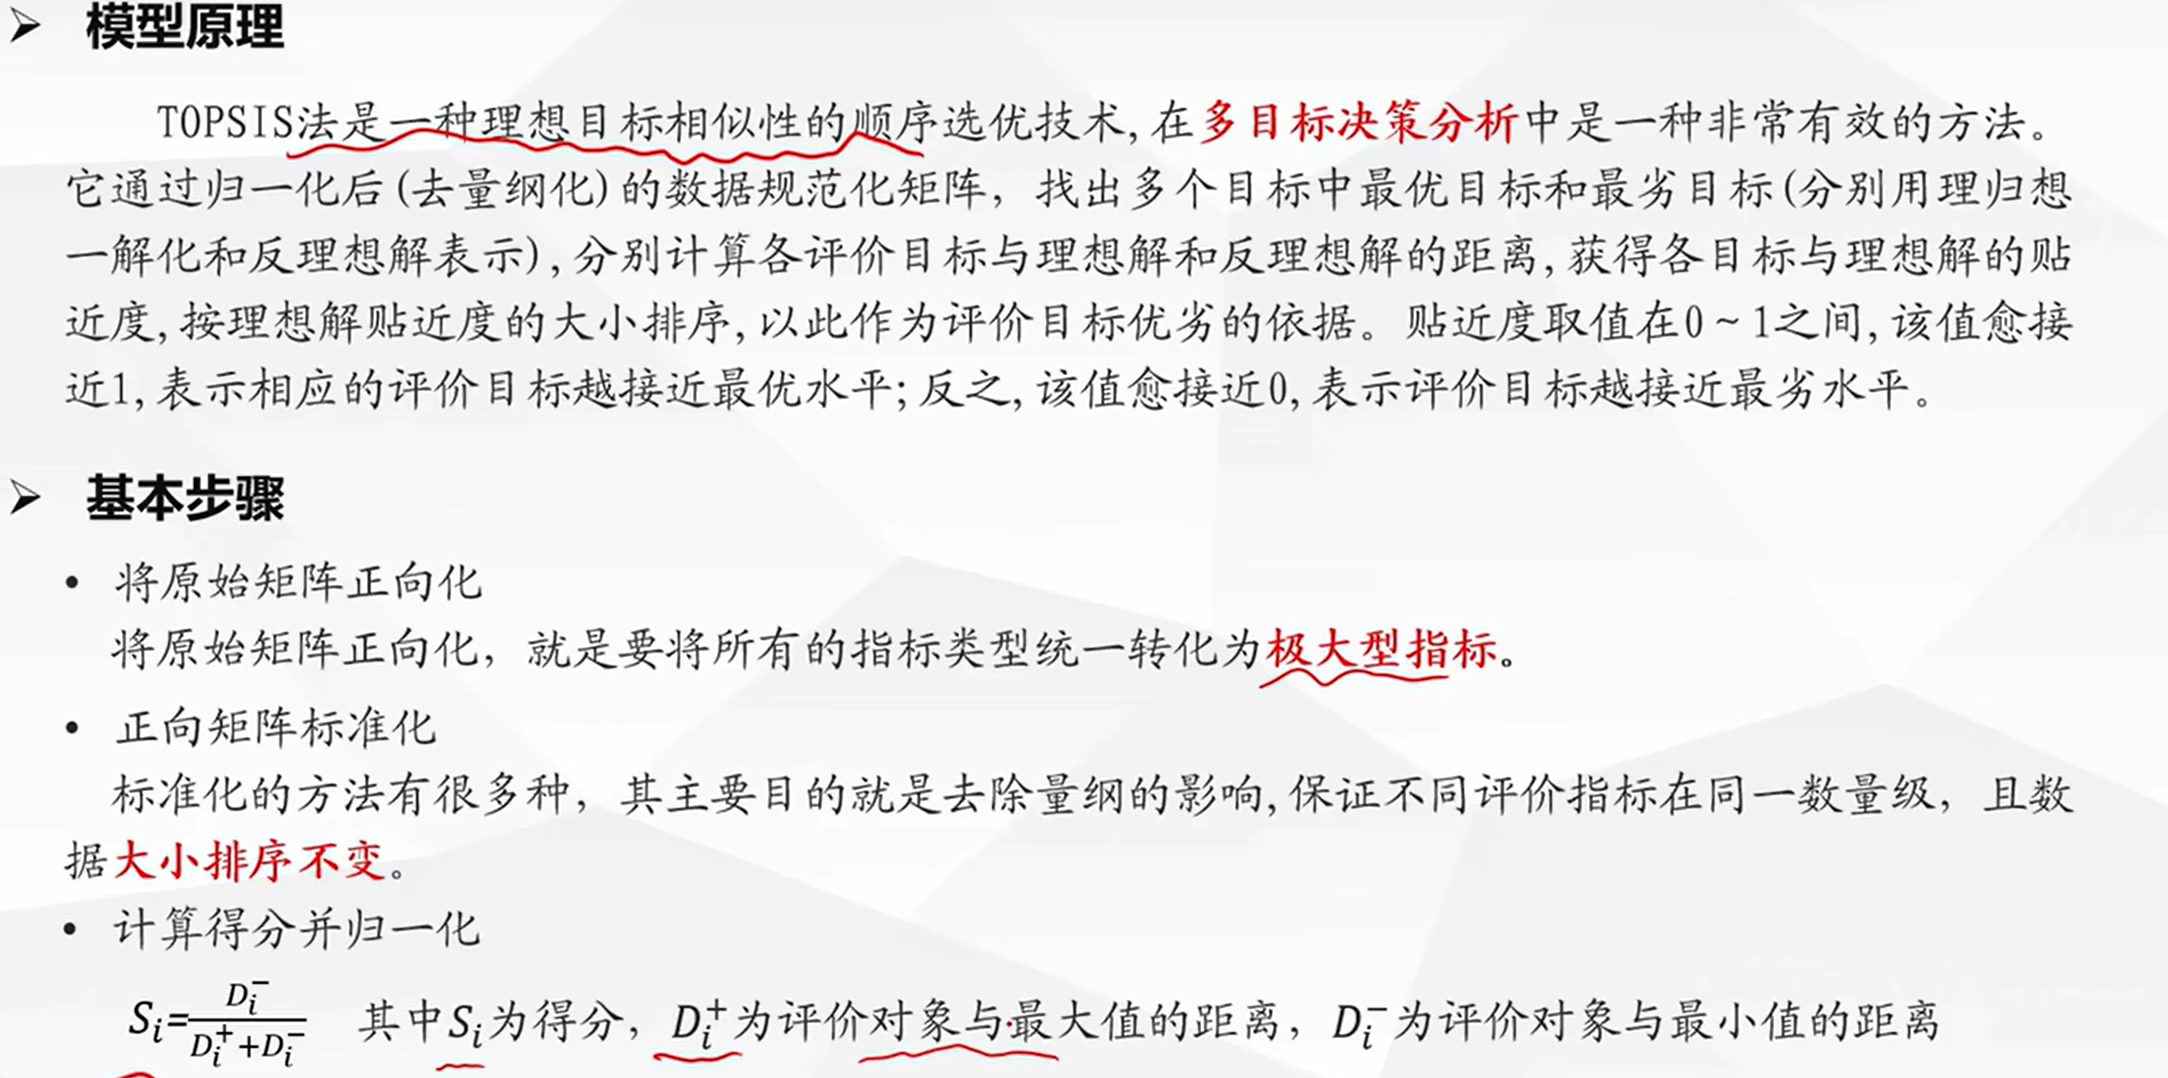

### 步骤一、正向化公式：
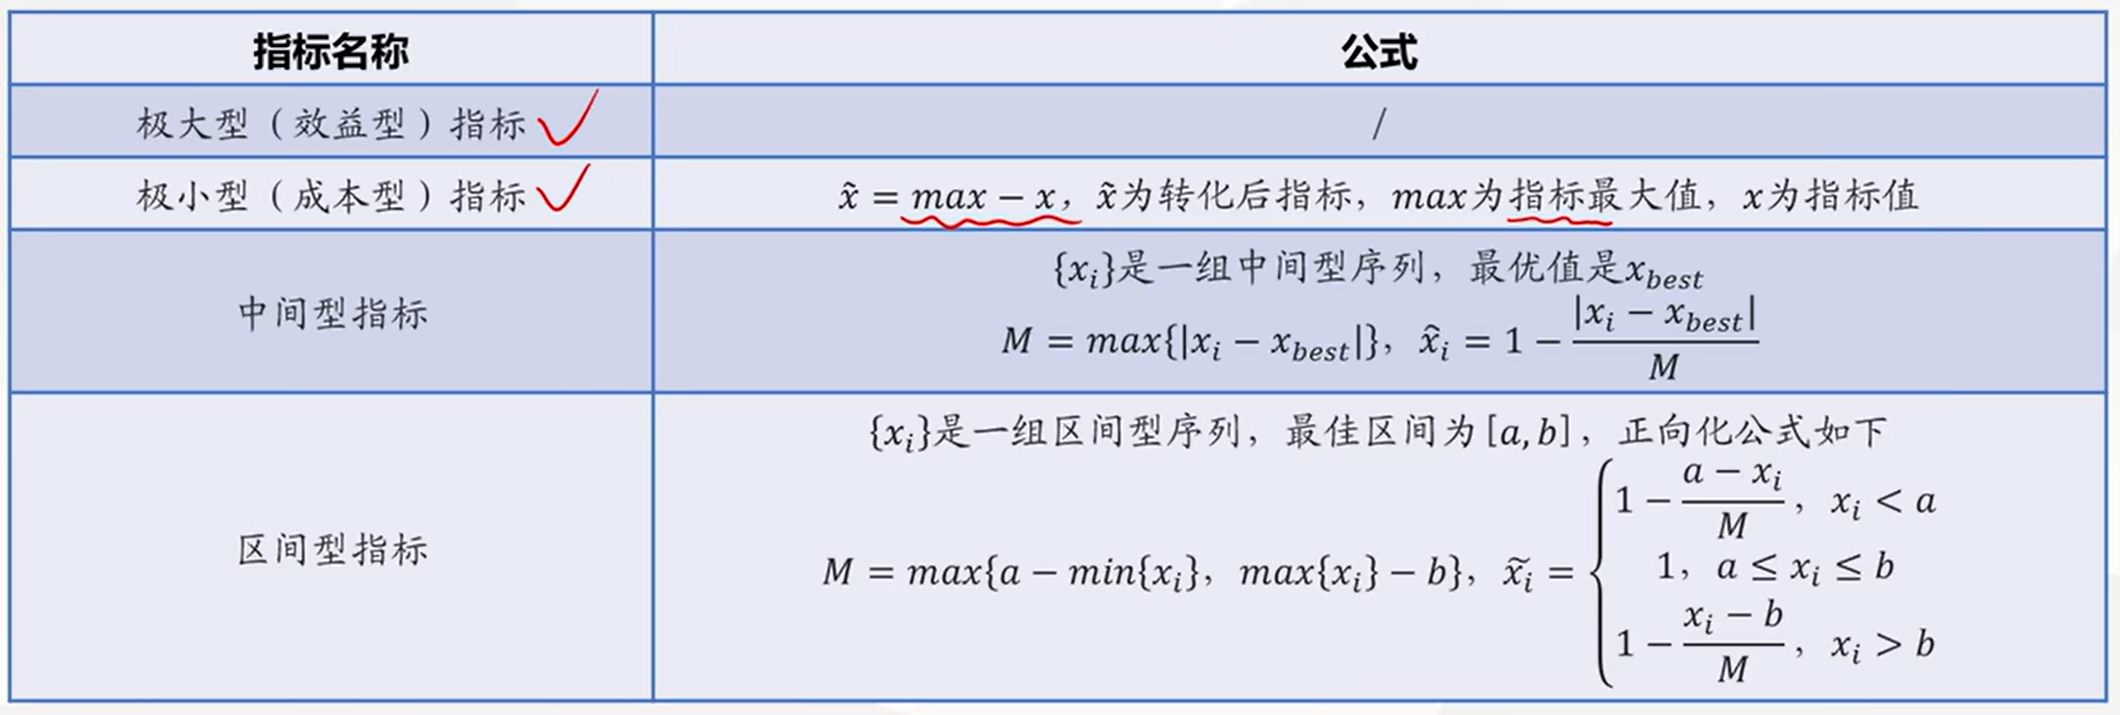

### 步骤二、矩阵标准化：消除不同指标量纲的影响
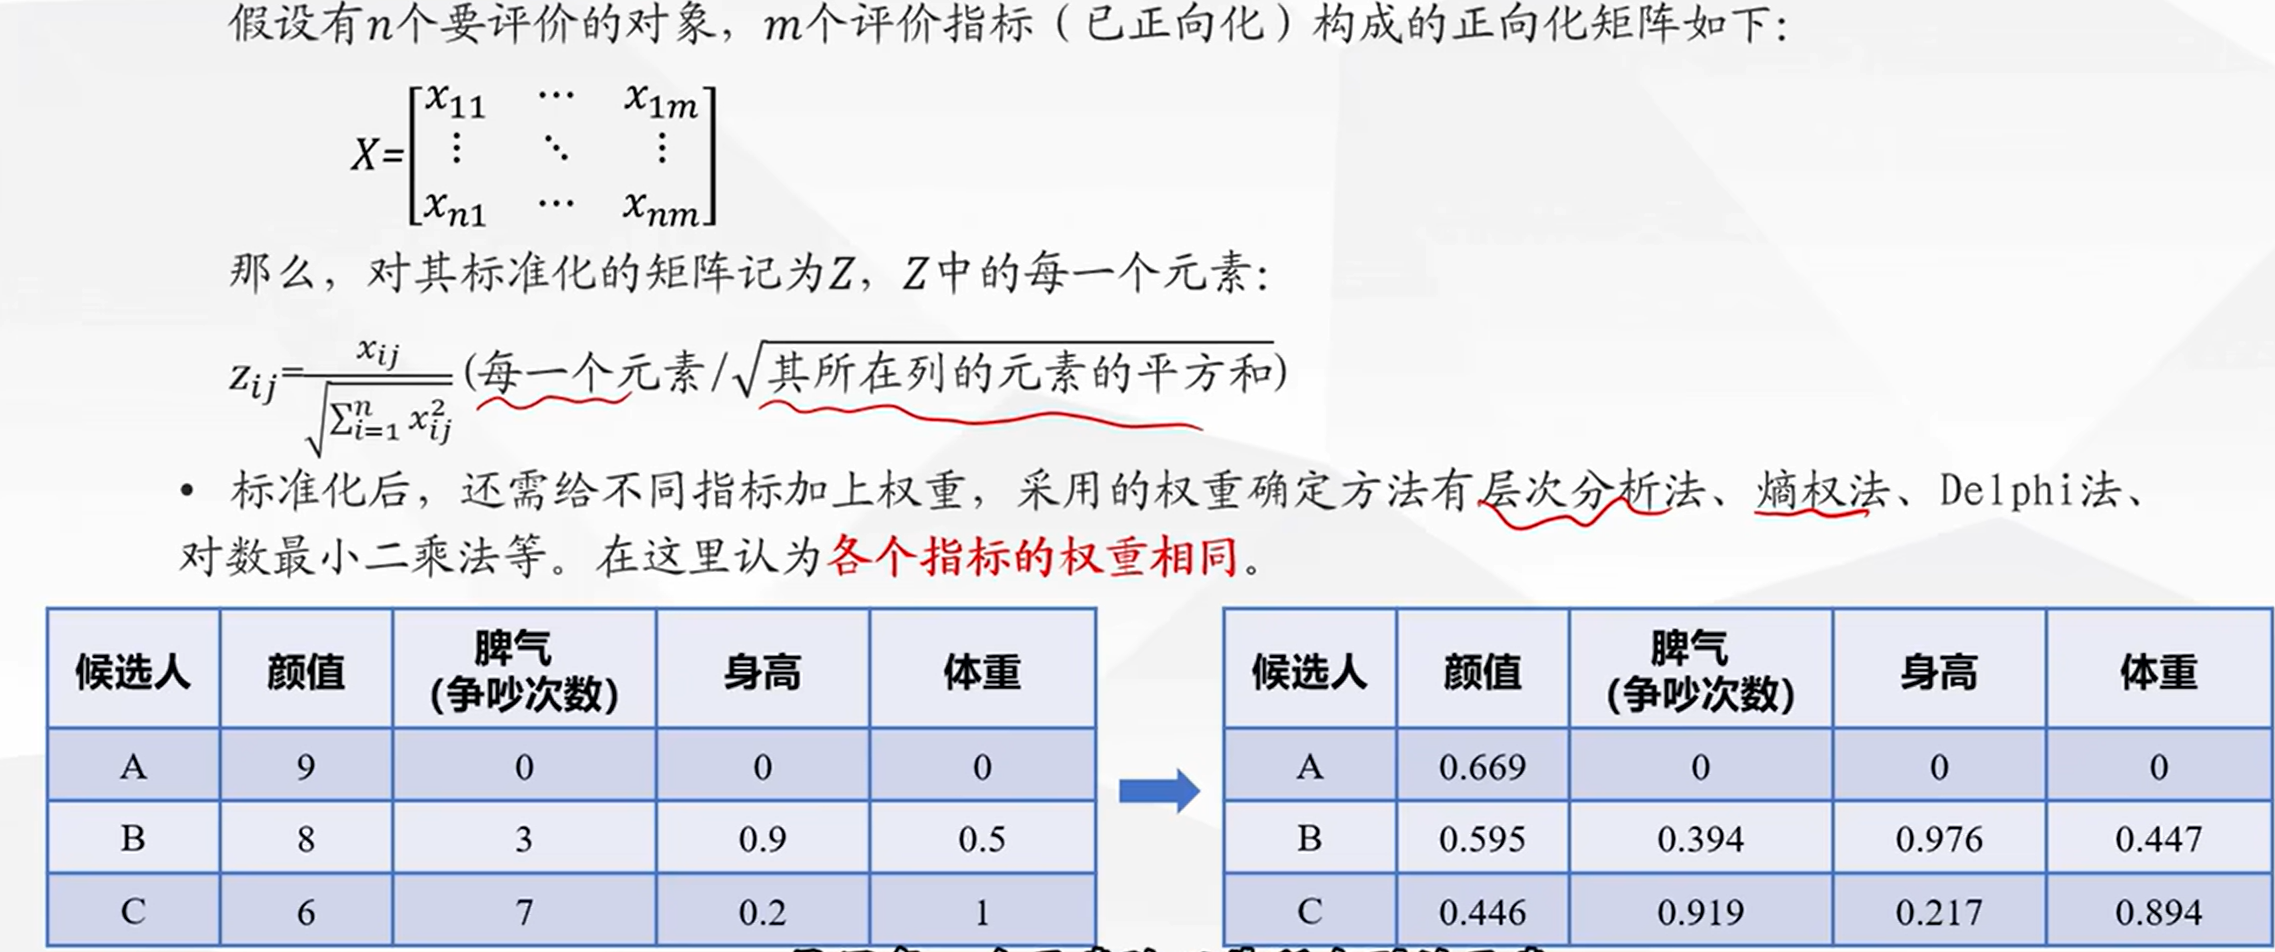

### 步骤三、计算得分并归一化
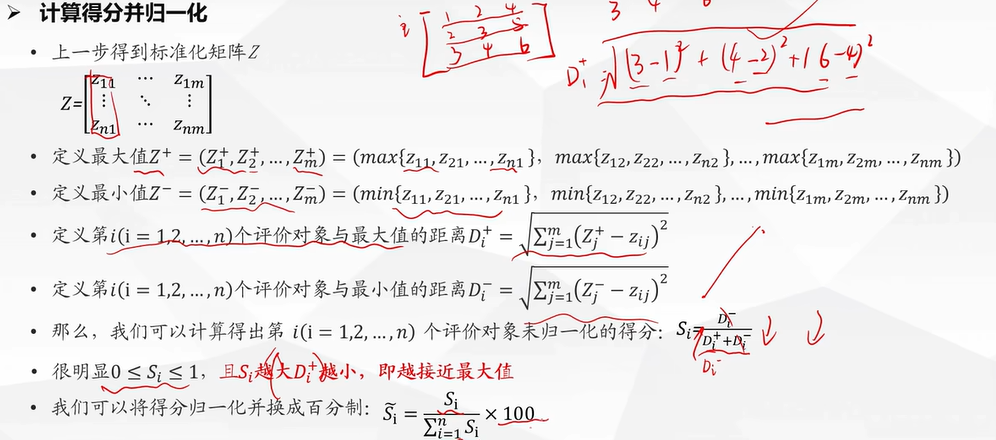

In [7]:
import numpy as np

# 从用户输入中获取参评数目和指标数目，并将输入的字符串转换为数值
n = int(input("请输入参评数目>"))
m = int(input("请输入指标数目>"))

# 接收用户输入的类型矩阵，该矩阵指示了每个指标的类型
kind = input("请输入类型矩阵：1、极大型 2、极小型 3、中间型 4、区间型").split(" ")

# 接收用户的矩阵并转换为numpy数组
print("请输入矩阵：")
A = np.zeros(shape=(n, m))
for i in range(n):
    A[i] = input().split(" ") # 接收每行输入的数据
    A[i] = list(map(float, A[i])) #将接收到的字符串列表转换为浮点数列表
print("输入矩阵为：\n{}".format(A))


# 极小型指标转换为极大型指标的函数
def minToMax(max_x, x):
    x = list(x) # 将输入的指标数据转换为列表
    ans = [[(max_x - e)] for e in x] # 计算每个指标值与最优值之间的绝对差
    return np.array(ans) # 将列表转换为numpy数组并返回


# 中间型指标转换为极大型指标的函数
def midToMax(best_x, x):
    x = list(x)
    h = [abs(e - best_x) for e in x] # 计算每个指标与最优值之间的绝对差
    M = max(h) # 找到最大的差值
    if M == 0:
        M = 1 # 防止最大差值为0的情况
    ans = [[1 - e/M] for e in h] # 计算每个差值占最大差值的比例，并从1中减去，得到新指标值
    return np.array(ans)


def regToMax(low_x, high_x, x):
    x = list(x)
    M = max(low_x - min(x), max(x) - high_x)
    if M == 0:
        M = 1
    ans = []
    for i in range(len(x)):
        if x[i] < low_x:
            ans.append([(1 - (low_x-x[i])/M)])
        elif x[i] > high_x:
            ans.append([(1 - (x[i]-high_x)/M)])
        else:
            ans.append([1])
    return np.array(ans)


# 统一指标类型，将所有指标转化为极大型指标
X = np.zeros(shape=(n, 1))
for i in range(m):
    if kind[i] == "1":
        v = np.array(A[:, i])
    elif kind[i] == "2":
        maxA = max(A[:, i])
        v = minToMax(maxA, A[:, i])
    elif kind[i] == "3":
        bestA = eval(input("类型三，请输入最优值："))
        v = midToMax(bestA, A[:, i])
    elif kind[i] == "4":
        lowA = eval(input("类型四，请输入区间[a, b]值a："))
        highA = eval(input("类型四，请输入区间[a, b]值b："))
        v = regToMax(lowA, highA, A[:, i])
    
    if i == 0:
        X = v.reshape(-1, 1) # 如果是第一个指标，直接替换X数组（把数组转换为列向量）
    else:
        X = np.hstack([X, v.reshape(-1, 1)]) # 如果不是第一个指标，则把新指标列拼接到X数组上
print("统一指标后的矩阵为：\n{}".format(X))


# 对统一指标后的矩阵X进行标准化处理
X = X.astype('float') # 确保X矩阵的数据类型为浮点数
for j in range(m):
    X[:, j] = X[:, j]/np.sqrt(sum(X[:, j]**2)) # 对每一列数据进行归一化处理，即除以该列的欧几里得范数
print("标准化矩阵为：\n{}".format(X))


# 最大值最小值距离的计算
x_max = np.max(X, axis=0) # 计算标准化矩阵每列的最大值
x_min = np.min(X, axis=0) # 计算标准化矩阵每列的最小值
d_z = np.linalg.norm(X - x_max, axis=1)  # 计算每个参评对象与最优情况的距离d+
d_f = np.linalg.norm(X - x_min, axis=1)  # 计算每个参评对象与最劣情况的距离d-
print('每个指标的最大值:', x_max)
print('每个指标的最小值:', x_min)
print('d+向量:', d_z)
print('d-向量:', d_f)

# 计算每个参评对象的得分排名
s = d_f / (d_z + d_f)  # 根据d+和d-计算得分s，其中s接近于1则表示较优，接近于0则表示较劣
Score = 100 * s / sum(s)  # 将得分s转换为百分制，便于比较
for i in range(len(Score)):
    print(f"第{i+1}个标准化后百分制得分为：{Score[i]}")  # 打印每个参评对象的得分

请输入矩阵：
输入矩阵为：
[[  9.  10. 175. 120.]
 [  8.   7. 164.  80.]
 [  6.   3. 157.  90.]]
统一指标后的矩阵为：
[[9.  0.  0.  0. ]
 [8.  3.  0.9 0.5]
 [6.  7.  0.2 1. ]]
标准化矩阵为：
[[0.66896473 0.         0.         0.        ]
 [0.59463532 0.3939193  0.97618706 0.4472136 ]
 [0.44597649 0.91914503 0.21693046 0.89442719]]
每个指标的最大值: [0.66896473 0.91914503 0.97618706 0.89442719]
每个指标的最小值: [0.44597649 0.         0.         0.        ]
d+向量: [1.61175952 0.69382053 0.79132442]
d-向量: [0.22298824 1.15334862 1.30072534]
第1个标准化后百分制得分为：8.886366735657832
第2个标准化后百分制得分为：45.653341055701134
第3个标准化后百分制得分为：45.46029220864103
